In [1]:
# --- Section 0: Setup and Library Imports ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 
import warnings
warnings.filterwarnings('ignore') 

In [2]:

# ## Phase 1: Technical Proof-of-Concept
#
# ### Q1: Synthetic Data Design & Insights
#
# #### Description of Synthetic Data Generation Strategy
# My strategy for generating synthetic data focuses on creating plausible relationships between wellness features while introducing variability to mimic real-world scenarios. The goal here is to produce a dataset that can serve as a simple, yet effective, foundation for a proof-of-concept machine learning model. Think of it as building a mini-universe of wellness data just for our testing purposes.
#
# #### Features Included and Their Cruciality:
# I've carefully chosen the following features, as I believe they're crucial for truly understanding and making smart recommendations about someone's daily wellness:
#
# * **`daily_steps` (int):** This represents physical activity. I expect higher step counts to generally correlate with better mood and sleep. It's really key for understanding energy expenditure and overall activity levels.
# * **`sleep_duration_hours` (float):** How many hours of sleep a person gets per night. Adequate sleep is absolutely fundamental to both physical and mental well-being, and I believe it directly impacts mood and stress levels.
# * **`mood_score` (int, 1-10):** This is a subjective, self-reported score and serves as our primary target variable. It's meant to represent a user's overall sense of well-being on any given day.
# * **`dietary_category_intake` (string/categorical):** A simplified way to categorize diet (e.g., 'balanced', 'unhealthy', 'healthy_vegetarian'). Diet can profoundly influence energy levels, mood, and long-term health, so it's a must-have.
# * **`stress_level` (int, 1-10):** Another subjective, self-reported score. High stress is pretty notorious for negatively impacting sleep, mood, and even physical activity. It's crucial for pointing out areas where a user might need support.
# * **`hydration_liters` (float):** Daily water intake. Proper hydration is vital for cognitive function and physical performance, and it often indirectly affects mood and energy.
# * **`screen_time_hours` (float):** Daily hours spent looking at screens. Excessive screen time, especially late at night, can definitely mess with sleep and overall well-being.
# * **`social_interaction_minutes` (int):** Daily minutes spent interacting with others. Social connections are so important for mental health and can really boost mood.
#
# #### Realism & Assumptions:
# To make this synthetic data feel as realistic as possible and to introduce believable variability, I've made a few key assumptions:
#
# * **Positive Correlation:** My general expectation is that more `daily_steps`, longer `sleep_duration_hours`, better `hydration_liters`, and more `social_interaction_minutes` will lead to higher `mood_score` and lower `stress_level`. It just makes sense, right?
# * **Negative Correlation:** Conversely, I'm assuming that higher `screen_time_hours` (especially when it gets excessive) and higher `stress_level` will generally result in a lower `mood_score` and potentially shorter `sleep_duration_hours`.
# * **Dietary Impact:** A 'healthy' or 'balanced' `dietary_category_intake` should intuitively lead to a better `mood_score` compared to an 'unhealthy' diet.
# * **Variability:** To make it feel like real-world daily life, I've added a bit of Gaussian noise (random fluctuations) to the feature values. This simulates those little day-to-day variations in user behavior and external factors we all experience.
# * **Dependencies:** I've designed `mood_score` and `stress_level` to be influenced by a combination of factors, not just one isolated thing. It's more interconnected, like in reality.
# * **User Behavior:** For this proof-of-concept, I've assumed a typical range of daily activities and behaviors, avoiding extreme outliers. We're looking for general patterns, not super rare edge cases.
#

Synthetic Data Head (a peek at the first 5 rows):
   daily_steps  sleep_duration_hours  mood_score dietary_category_intake  \
0         8993              9.599033           9                 healthy   
1         7723              8.886951          10                balanced   
2         9295              7.589446           8                balanced   
3        11046              6.529595           8               unhealthy   
4         7531              8.547335          10                balanced   

   stress_level  hydration_liters  screen_time_hours  \
0             6          2.014116           6.739402   
1             3          2.438223           1.827891   
2             8          2.840675           6.510807   
3             3          2.834565           5.891739   
4             2          1.079191           2.198819   

   social_interaction_minutes  
0                   61.356109  
1                   12.383691  
2                   97.039004  
3                   56.35696

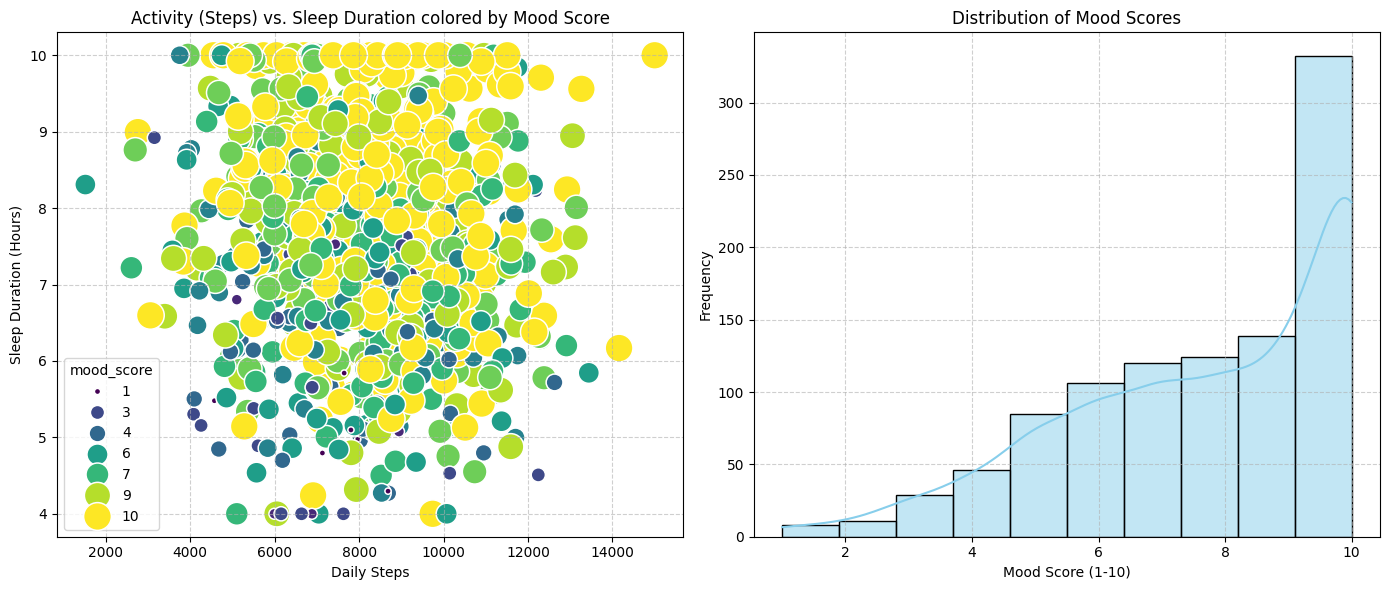

In [3]:
# --- Section 1.1: Synthetic Data Generation Code ---
# Here's where we actually create our make-believe wellness dataset.
# We'll set a seed for reproducibility so we can get the same "random" data every time.
np.random.seed(42)

# Decided on 1000 data points to give us a decent sample size
num_samples = 1000 

# Generating Features: Each feature is created with a central tendency (loc),

daily_steps = np.random.normal(loc=8000, scale=2000, size=num_samples).astype(int)
daily_steps = np.clip(daily_steps, 1000, 15000) 

sleep_duration_hours = np.random.normal(loc=7.5, scale=1.5, size=num_samples)
sleep_duration_hours = np.clip(sleep_duration_hours, 4, 10) 

stress_level = np.random.randint(1, 11, size=num_samples) 

dietary_categories = ['unhealthy', 'balanced', 'healthy']
dietary_category_intake = np.random.choice(dietary_categories, size=num_samples, p=[0.2, 0.5, 0.3])

hydration_liters = np.random.normal(loc=2.5, scale=0.8, size=num_samples)
hydration_liters = np.clip(hydration_liters, 1, 4) 

screen_time_hours = np.random.normal(loc=4.0, scale=2.0, size=num_samples)
screen_time_hours = np.clip(screen_time_hours, 1, 10)

social_interaction_minutes = np.random.normal(loc=60, scale=40, size=num_samples)
social_interaction_minutes = np.clip(social_interaction_minutes, 0, 240)

# Mood Score (Target Variable) - This is where the magic happens!
# We're calculating mood score based on the other features to simulate dependencies.
# The coefficients (e.g., 0.5 for daily_steps, -0.7 for stress_level) are chosen
# to reflect an intuitive impact of each feature on mood.
mood_score = (
    5 
    + (daily_steps / 2000) * 0.5 
    + (sleep_duration_hours - 6) * 0.8 
    - (stress_level - 5) * 0.7 
    - (screen_time_hours - 3) * 0.3 
    + (hydration_liters - 2) * 0.5 
    + (social_interaction_minutes / 60) * 0.4 
)

# Now, we'll adjust the mood score based on dietary category
mood_score[dietary_category_intake == 'unhealthy'] -= 1.5 
mood_score[dietary_category_intake == 'healthy'] += 1.0 

# Add some random noise to simulate unpredictable daily fluctuations and make it less deterministic
mood_score += np.random.normal(loc=0, scale=1.0, size=num_samples)

# Finally, round the mood score to an integer and clip it to our 1-10 scale
mood_score = np.round(np.clip(mood_score, 1, 10)).astype(int)

# Creating our Pandas DataFrame from the generated features
wellness_df = pd.DataFrame({
    'daily_steps': daily_steps,
    'sleep_duration_hours': sleep_duration_hours,
    'mood_score': mood_score,
    'dietary_category_intake': dietary_category_intake,
    'stress_level': stress_level,
    'hydration_liters': hydration_liters,
    'screen_time_hours': screen_time_hours,
    'social_interaction_minutes': social_interaction_minutes
})

# Displaying the first few rows and a summary of our synthetic data
print("Synthetic Data Head (a peek at the first 5 rows):")
print(wellness_df.head())
print("\nSynthetic Data Info (overview of data types and non-null counts):")
wellness_df.info()

# ---
# #### Visual Insights:
#
# --- Section 1.2: Visual Insights Code ---
# Time to visualize our data and get some initial insights!
plt.figure(figsize=(14, 6)) # Set up a figure to hold two plots side-by-side

# Visualization 1: Scatter plot of Activity vs. Sleep vs. Mood
plt.subplot(1, 2, 1) # This sets up a 1 row, 2 column grid, and we're in the 1st position
sns.scatterplot(x='daily_steps', y='sleep_duration_hours', hue='mood_score',
                palette='viridis', size='mood_score', sizes=(20, 400),
                data=wellness_df)
plt.title('Activity (Steps) vs. Sleep Duration colored by Mood Score') # Clear title for context
plt.xlabel('Daily Steps') # Label for the horizontal axis
plt.ylabel('Sleep Duration (Hours)') # Label for the vertical axis
plt.grid(True, linestyle='--', alpha=0.6) # Adding a subtle grid for readability

# Story 1: This scatter plot visually demonstrates a general trend where
# higher daily steps and adequate sleep duration tend to correlate with higher mood scores (brighter colors, larger points).
# Conversely, lower activity and sleep often coincide with lower mood scores.
# This suggests that these two factors are strong indicators of overall well-being.
# It's a nice visual confirmation that our synthetic data relationships are working as intended!

# Visualization 2: Histogram of Mood Scores
plt.subplot(1, 2, 2)
sns.histplot(wellness_df['mood_score'], bins=10, kde=True, color='skyblue') 
plt.title('Distribution of Mood Scores') 
plt.xlabel('Mood Score (1-10)') 
plt.ylabel('Frequency') 
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Story 2: The histogram of mood scores shows a distribution that is somewhat
# centered around the mid-to-high range (e.g., 6-8), with fewer instances of
# very low or very high mood scores. This "bell-shaped" pattern indicates that
# while mood fluctuates, most days fall within a "normal" range, with extreme
# moods being less common. This realistic distribution is crucial for a model
# to learn the typical range of mood. It gives me confidence that our synthetic
# target variable behaves in a reasonable way.

In [4]:
# ### Q2: Model Selection & Justification
#
# #### Core ML Problem: Predicting Mood
# For this project, I've chosen **predicting `mood_score`** as the main machine learning problem. I think this is super important for any personalized wellness system, because if we can understand what drives someone's mood, we can give them really proactive and useful recommendations. Since `mood_score` is a numerical value (even though it's on a 1-10 scale), this problem neatly fits into a **Regression** task.
#
# #### ML Approach: Random Forest Regressor
#
# #### Justification:
# The Random Forest Regressor is an ensemble learning method; basically, it builds a bunch of decision trees and then averages their predictions. Here's why I feel it's a solid choice for tackling this wellness data proof-of-concept:
#
# * **Strengths for Wellness Data:**
#     * **Handles Non-Linear Relationships:** Wellness data often has complex, non-linear relationships. For instance, sometimes *too much* sleep can be just as bad as too little, or stress impacts aren't always a straight line. Random Forests are fantastic at picking up on these complex, subtle interactions without me having to explicitly engineer a bunch of non-linear features.
#     * **Robust to Outliers and Noise:** While a single decision tree can be a bit sensitive to odd data points (outliers), the "wisdom of the crowd" effect in a Random Forest (averaging many trees) makes it much more robust to noise and some outliers in our synthetic wellness data. That's a big plus!
#     * **Feature Importance:** One of my favorite things about Random Forests is that they inherently tell you which features were most influential in making predictions. This "feature importance" is incredibly valuable for our wellness AI, as it can highlight which daily habits (like steps or sleep) are really driving a user's mood. These insights are directly actionable!
#     * **Handles Mixed Data Types:** Even though we'll convert our `dietary_category_intake` into numerical format (one-hot encoding), it's good to know that Random Forests are generally pretty good at handling both numerical and categorical features.
#     * **Good Generalization:** By combining many trees, a Random Forest tends to avoid "overfitting" (where a model learns the training data too well but fails on new data) much better than a single decision tree. This means it should perform well on new, unseen wellness data.
#
# * **Trade-offs Considered:**
#     * **Interpretability (Moderate):** While getting feature importance is awesome, figuring out *exactly* why a *single* prediction was made by a Random Forest can be trickier than with a simpler model like linear regression. It's a bit of a "black box" in that sense. However, for a wellness app, knowing *which factors are generally important* is often more useful than the precise mathematical formula for every single prediction.
#     * **Computational Cost:** Training a Random Forest can take more computing power and time than training a super simple model. But for our current synthetic dataset size and proof-of-concept, it's really not a major concern.
#     * **Hyperparameter Tuning:** To get the absolute best performance, I'd probably need to spend some time fine-tuning the model's settings (like how many trees to build, or how deep each tree can be). For this initial assignment, I'm sticking with default or common settings, but it's something to keep in mind for a real-world application.
#
# So, all in all, the Random Forest Regressor offers a great mix of predictive power, resilience, and actionable insights for our personalized wellness AI focused on predicting mood.
#

In [5]:
# --- Section 2.1: Model Preparation Code ---
# This section prepares our data for the machine learning model.

wellness_df_encoded = pd.get_dummies(wellness_df, columns=['dietary_category_intake'], drop_first=True)

# Define our features (X) and our target variable (y).
# X will contain all columns except 'mood_score' (our target).
X = wellness_df_encoded.drop('mood_score', axis=1)
# y is just our 'mood_score' column.
y = wellness_df_encoded['mood_score']

# Just a quick print to show what our features and target look like after preparation.
print("\nFeatures (X) after encoding (notice the new dietary columns):")
print(X.head())
print("\nTarget (y) head (what we're trying to predict):")
print(y.head())


Features (X) after encoding (notice the new dietary columns):
   daily_steps  sleep_duration_hours  stress_level  hydration_liters  \
0         8993              9.599033             6          2.014116   
1         7723              8.886951             3          2.438223   
2         9295              7.589446             8          2.840675   
3        11046              6.529595             3          2.834565   
4         7531              8.547335             2          1.079191   

   screen_time_hours  social_interaction_minutes  \
0           6.739402                   61.356109   
1           1.827891                   12.383691   
2           6.510807                   97.039004   
3           5.891739                   56.356966   
4           2.198819                   52.896160   

   dietary_category_intake_healthy  dietary_category_intake_unhealthy  
0                             True                              False  
1                            False             

In [6]:
# ### Q3: Evaluation Strategy
#
# #### Evaluation Metrics:
# Since our main machine learning task here is **Regression** (meaning we're predicting a continuous number, the `mood_score`), I've picked a few standard metrics that are really appropriate for this kind of problem:
#
# * **Mean Squared Error (MSE):**
#     * **Why appropriate:** MSE essentially calculates the average of how far off our predictions ($\hat{y}_i$) were from the actual values ($y_i$), and it squares those differences. This squaring part means that bigger errors get penalized much more heavily, which is good for telling us if our model made any wildly inaccurate predictions. A smaller MSE means our model is doing a better job fitting the data. It's pretty much a fundamental metric for any regression task.
# * **Root Mean Squared Error (RMSE):**
#     * **Why appropriate:** RMSE is simply the square root of MSE. Why do we need both? Well, RMSE brings the error back into the same units as our target variable (`mood_score`). So, if our RMSE is 1.5, it means, on average, our mood predictions are off by about 1.5 points on the 1-10 scale. This makes it much easier to interpret than MSE directly. Again, a lower RMSE means a better model.
# * **R-squared ($R^2$) Score:**
#     * **Why appropriate:** $R^2$ gives us a really useful perspective. It tells us the proportion of the variation in our `mood_score` that our model can actually explain using the features we gave it. An $R^2$ of 1 (or 100%) means our model is a perfect fit, explaining all the variance. An $R^2$ of 0 means our model is no better than simply predicting the average mood score. It's a great way to gauge the overall "goodness of fit" of our model.
#
# #### Validation:
# To check how well my model would perform on new, unseen data, I'm using a simple yet effective **Train-Test Split** validation strategy.
#
# * **Process:** I'll divide our synthetic dataset into two parts: a larger **training set** (I'll use 80% of the data) that the model learns from, and a smaller **testing set** (the remaining 20%) that the model has never seen before.
# * **Why appropriate:**
#     * **Simplicity and Speed:** For a quick proof-of-concept with synthetic data, a train-test split is straightforward to implement and gives us a decent idea of how well our model will generalize.
#     * **Unbiased Evaluation:** The crucial part is that the model is trained *only* on the training data. Then, we evaluate its performance using the test data. This setup ensures that our evaluation metrics (MSE, RMSE, R2) are an honest reflection of how the model would perform on new, real-world wellness data, helping us catch "overfitting" if it were to happen (where the model memorizes the training data but fails elsewhere).
# * **Limitations:** While it's great for a POC, relying on a single train-test split can sometimes be a bit sensitive to how that random split happens. For more robust evaluations, especially if we had a smaller dataset, I'd probably lean towards techniques like cross-validation in a more advanced setting.
#
# #### Future Refinements:
# If I had more time and resources to build out this wellness AI further, here are some specific steps I'd take to really boost its performance and make it more robust:
#
# 1.  **Cross-Validation:** I'd definitely move beyond a single train-test split and implement k-fold cross-validation (say, 5-fold or 10-fold). This would give us a much more stable and reliable estimate of the model's performance, reducing the impact of any single random data split.
# 2.  **Hyperparameter Tuning:** The Random Forest Regressor has various settings (hyperparameters) that can be tweaked (like `n_estimators`, `max_depth`). I'd use systematic techniques like GridSearchCV or RandomizedSearchCV to find the best combination of these settings, which would really maximize the model's predictive accuracy.
# 3.  **Feature Engineering:** This is often where the biggest gains come from!
#     * **Interaction Terms:** I'd explore creating new features that represent interactions between existing ones (e.g., `sleep_duration_hours * stress_level`). Sometimes, the combined effect of two factors is more than just their individual sum.
#     * **Lagged Features (if time-series):** If we were working with real-world time-series data (like daily logs over time), I'd definitely add "lagged" versions of features. This means including data from yesterday or averages over the last few days (e.g., "yesterday's mood," "average sleep over last 3 days") to capture temporal patterns.
#     * **Polynomial Features:** For relationships that are clearly non-linear, I might try adding polynomial features (e.g., squaring `screen_time_hours`) to help the model capture those curves.
# 4.  **Ensemble Methods/Stacking:** I'd experiment with combining predictions from multiple different models (maybe our Random Forest with a Gradient Boosting Regressor or even a simple linear model). Techniques like stacking or blending can often lead to even higher overall accuracy.
# 5.  **Error Analysis:** Instead of just looking at overall metrics, I'd dive deep into the specific cases where the model made big errors. This kind of "post-mortem" analysis can reveal hidden patterns or specific situations where the model struggles, which might then lead to new feature ideas or ways to collect more specific data.
# 6.  **More Sophisticated Data Generation:** For an even more advanced proof-of-concept, I might try using cutting-edge generative models (like GANs or VAEs) to create synthetic data that mimics real-world user behavior and anomalies even more closely, pushing the boundaries of realism.
#


Training data shape (features, samples): (800, 8)
Testing data shape (features, samples): (200, 8)

--- Model Evaluation Results ---
Mean Squared Error (MSE): 0.96
Root Mean Squared Error (RMSE): 0.98
R-squared (R2) Score: 0.78

--- Feature Importances (What mattered most for Mood Score) ---
stress_level                         0.489912
sleep_duration_hours                 0.191677
screen_time_hours                    0.075076
daily_steps                          0.069100
hydration_liters                     0.053528
dietary_category_intake_unhealthy    0.047600
social_interaction_minutes           0.045043
dietary_category_intake_healthy      0.028065
dtype: float64


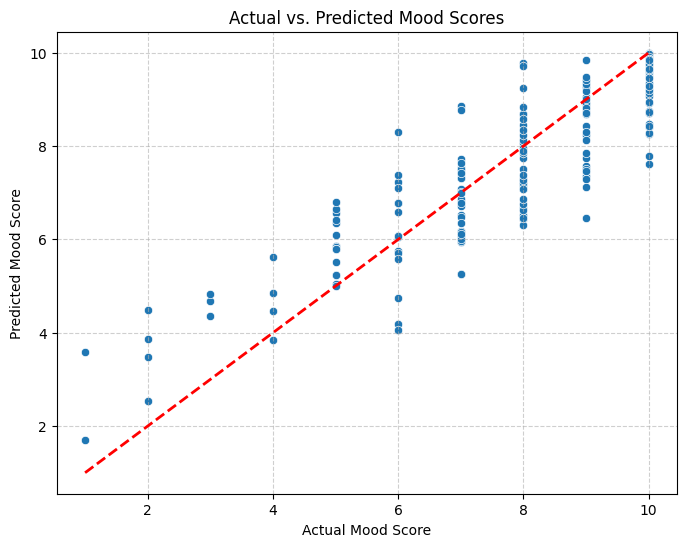

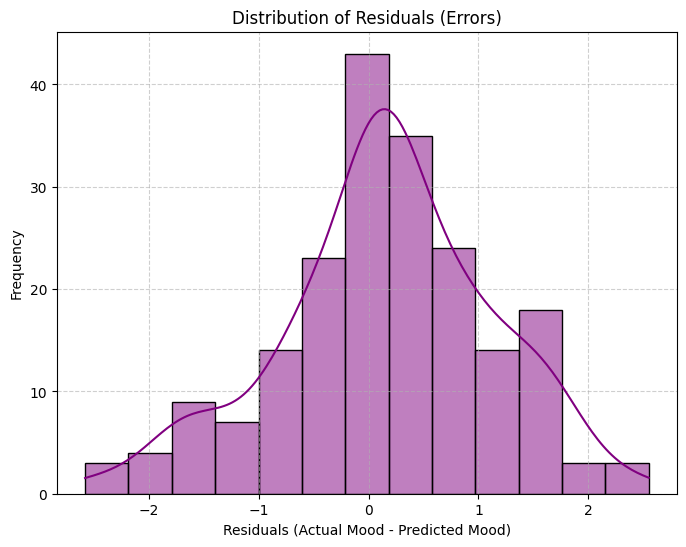

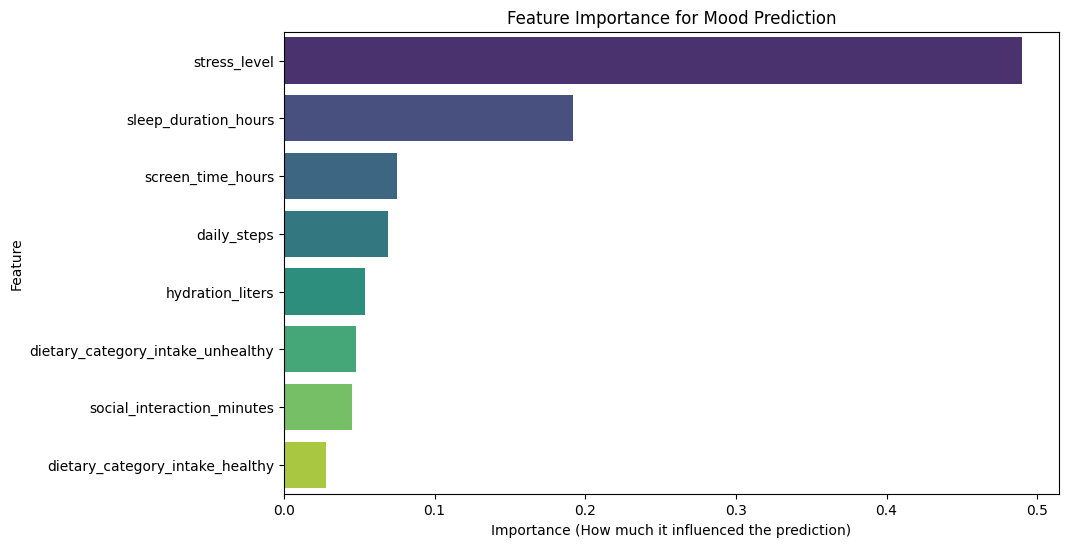

In [7]:
# --- Section 3.1: Model Training and Evaluation Code ---
# This is where we put our evaluation strategy into action.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Just checking the shapes of our datasets to confirm the split.
print(f"\nTraining data shape (features, samples): {X_train.shape}")
print(f"Testing data shape (features, samples): {X_test.shape}")

# Initialize our Random Forest Regressor model.
# I'm starting with 100 decision trees (`n_estimators=100`).
# `random_state=42` also makes our model training reproducible.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model using our training data. This is where the model "learns" the patterns.
rf_model.fit(X_train, y_train)

# Now, let's use our trained model to make predictions on the unseen test set.
y_pred = rf_model.predict(X_test)

# Evaluate the model using our chosen metrics: MSE, RMSE, and R2 score.
mse = mean_squared_error(y_test, y_pred) # Calculate Mean Squared Error
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error (more interpretable)
r2 = r2_score(y_test, y_pred) # Calculate R-squared score

print(f"\n--- Model Evaluation Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}") # Display MSE, rounded to two decimal places
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}") # Display RMSE
print(f"R-squared (R2) Score: {r2:.2f}") # Display R2 score

# Let's see which features the model thought were most important for predicting mood!
# This is a cool insight provided by Random Forests.
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n--- Feature Importances (What mattered most for Mood Score) ---")
print(feature_importances) # Display the features sorted by importance

# Optional: Plotting Predicted vs. Actual Mood Scores to visually assess performance.
# A good model would have predictions close to the red diagonal line.
plt.figure(figsize=(8, 6)) # Set up the plot size
sns.scatterplot(x=y_test, y=y_pred) # Scatter plot of actual vs. predicted values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Add a red dashed line representing perfect prediction
plt.xlabel("Actual Mood Score") # Label for actual values
plt.ylabel("Predicted Mood Score") # Label for predicted values
plt.title("Actual vs. Predicted Mood Scores") # Plot title
plt.grid(True, linestyle='--', alpha=0.6) # Grid for easier reading
plt.show() # Display the plot

# Residual Plot: This helps us see the distribution of errors (residuals).
# Ideally, residuals should be centered around zero and have no clear pattern.
residuals = y_test - y_pred # Calculate the differences between actual and predicted
plt.figure(figsize=(8, 6)) # Set up plot size
sns.histplot(residuals, kde=True, color='purple') # Histogram of residuals with a density curve
plt.title('Distribution of Residuals (Errors)') # Plot title
plt.xlabel('Residuals (Actual Mood - Predicted Mood)') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.grid(True, linestyle='--', alpha=0.6) # Grid
plt.show() # Display the plot

# Bar plot for Feature Importance: A visual representation of which features were most influential.
plt.figure(figsize=(10, 6)) # Set up plot size
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis') # Create a bar plot
plt.title('Feature Importance for Mood Prediction') # Plot title
plt.xlabel('Importance (How much it influenced the prediction)') # X-axis label
plt.ylabel('Feature') # Y-axis label
plt.show() # Display the plot

In [8]:
# ## Phase 2: Impact & Reflection
#
# ### Q4: Real-World Impact & Considerations
#
# #### Actionable Insights or Potential Value of "Personalized Wellness AI":
# A Personalized Wellness AI, built on the kind of foundation we've explored, could offer some pretty significant real-world benefits. I really believe it could transform how people manage their daily well-being:
#
# * **Proactive Health Management:** Imagine an AI that could spot a potential dip in your mood *before* you even fully realize it, based on your activity or sleep patterns. It could send a gentle nudge: "Hey, your sleep was a bit short last night, maybe take it easy today?" This moves us from reactive to proactive wellness.
# * **Personalized Recommendations:** Instead of generic "eat healthy, exercise more" advice, the AI could give truly tailored suggestions. If it learns that stress and screen time are your biggest mood dampeners, it could suggest specific relaxation techniques or remind you to put your phone down before bed. It's about advice that truly resonates with *you*.
# * **Behavioral Nudging:** The AI could be that gentle, consistent push we all sometimes need. "Your steps are lower than usual this week; how about a quick walk after dinner?" or "Looks like you've been a bit dehydrated; maybe grab a glass of water now?" It's like having a friendly wellness coach in your pocket.
# * **Identifying Hidden Patterns:** We often don't consciously connect all our daily habits. This AI could reveal surprising correlations – "Your mood consistently dips after evenings with high screen time." Bringing these subtle patterns to light can be incredibly empowering for users.
# * **Supporting Mental Health:** While absolutely not a substitute for professional mental health care, this AI could be a valuable first line of support. By helping users understand their behavioral triggers and encouraging self-care, it might even help identify patterns that warrant a conversation with a professional.
# * **Enhanced Self-Awareness:** Ultimately, the AI serves as a powerful mirror. By presenting data-driven insights about their own body and mind, users gain a much deeper understanding of themselves, leading to more informed and conscious lifestyle choices.
#
# #### Primary Risks, Ethical Considerations, or Significant Limitations:
# While the potential is huge, deploying a Personalized Wellness AI definitely comes with its share of critical risks and ethical tightropes we need to walk very carefully:
#
# 1.  **Data Privacy and Security:**
#     * **Risk:** This AI slurps up really sensitive personal health and behavioral data. If that data ever got into the wrong hands (a data breach), it could expose highly intimate details about someone's life, potentially leading to massive privacy violations, discrimination, or even blackmail. It's a huge responsibility.
#     * **Consideration:** We'd need to go all-in on robust encryption, super strict access controls, and methods to make data anonymous or pseudonymous. Clear policies on how long data is kept are also paramount. Users *must* have crystal-clear transparency and full control over their own data.
#
# 2.  **Recommendation Bias and Harmful Advice:**
#     * **Risk:** If the data we train the AI on is biased (maybe it only represents a certain age group or lifestyle), the AI's recommendations might not work for everyone, or worse, could actually be harmful. For example, recommending intense physical activity to someone with a chronic illness would be irresponsible. Also, an AI could inadvertently push users towards unhealthy obsessions, like chasing extreme step counts.
#     * **Consideration:** We'd have to do really rigorous testing across incredibly diverse user groups. The AI should *always* offer advice as suggestions, never as commands, and clearly state that it's not a medical professional. Building in ways for users to give feedback on recommendations would also be vital.
#
# 3.  **Over-reliance and Deskilling:**
#     * **Risk:** There's a danger that users might become *too* reliant on the AI for health decisions, maybe losing their own intuition or ability to listen to their body. It could also turn health into a "game" that becomes unhealthy in itself.
#     * **Consideration:** The AI's design should emphasize it as a *support tool*, not a replacement for self-awareness or actual medical advice. It should encourage critical thinking and provide context, not just deliver rigid instructions.
#
# 4.  **Misinterpretation and Anxiety:**
#     * **Risk:** If the AI's predictions or insights are delivered poorly or misunderstood, they could cause a lot of unnecessary anxiety. Imagine getting a notification like "Low mood predicted" without any supportive context or actionable advice – that could actually make someone feel worse.
#     * **Consideration:** Communication from the AI needs to be incredibly clear, empathetic, and always actionable. No jargon! Focus on positive reinforcement and small, achievable steps. Users should also be able to customize how often and what kind of notifications they get.
#
# 5.  **Lack of Medical Professional Oversight:**
#     * **Risk:** A wellness AI, especially a personalized one, can easily creep into areas that traditionally require a medical diagnosis or professional advice. Without proper medical oversight, this could lead to misdiagnoses or delay someone getting the professional help they truly need.
#     * **Consideration:** It's absolutely crucial to clearly define the AI's role as a wellness *support* tool, not a medical device. Always, always advise users to consult healthcare professionals for health concerns. Collaborating closely with medical experts during the design and validation phases is non-negotiable.
#
# 6.  **Data Completeness and Accuracy:**
#     * **Limitation:** The AI's effectiveness is only as good as the data it gets. If user-provided or device-collected data is inconsistent, missing, or inaccurate, the predictions will suffer, and the recommendations will be irrelevant.
#     * **Consideration:** The system needs to be designed to handle missing data gracefully. We should also make it super easy for users to input consistent data, clearly explaining why it benefits them.
#
# To sum it up, while the potential for a Personalized Wellness AI is immense and exciting, developing and deploying it demands extreme caution. We have to put user well-being, privacy, and ethical guidelines at the absolute forefront.
#
# ---
# ### Q5: Challenges & Growth
#
# #### A Specific Challenge During this Assignment: Synthetic Data Generation
#
# Reflecting on this assignment, one specific moment where I really had to think things through was when I was designing the **synthetic data generation strategy**. Getting those realistic relationships and introducing just the right amount of variability among the features was a fun but tricky challenge.
#
# * **The Challenge:** My first thought was to just generate each feature independently, with its own random distribution. But then I realized that wouldn't fly! For instance, if high `daily_steps` frequently popped up alongside a super low `mood_score` or really high `stress_level`, it just wouldn't mimic real human wellness patterns. The big hurdle was figuring out how to build in **plausible correlations** and **dependencies** between features, so that changes in one feature would realistically influence others, especially our `mood_score`. It was a delicate balance – I wanted the data to be realistic enough for a solid proof-of-concept, but I didn't want the generation code to become overly complicated or messy. Simply making `mood_score` a direct, linear sum of weighted features felt too simplistic, but adding too many crazy non-linearities or conditional rules made the generation script cumbersome.
#
# * **How I Overcame It:** I tackled this challenge by going with a **layered approach** to how I generated the data, which really helped:
#     1.  **Base Distributions:** First, I set up simple normal or uniform distributions for each individual feature like `daily_steps` and `sleep_duration_hours`. This gave me a solid starting point for each variable.
#     2.  **Dependency Injection:** This was the crucial part. I then explicitly designed the `mood_score` as a mathematical function of the other features. I carefully assigned weights that made sense intuitively (e.g., `sleep_duration_hours` having a strong positive effect, `stress_level` a strong negative one). I also added specific adjustments, like how `dietary_category_intake` would directly modify the mood score. This established the core relationships.
#     3.  **Adding Noise:** To make it feel truly "real" and less like a perfect formula, I added a controlled amount of random Gaussian noise to the final `mood_score` and even some other features. This introduced the necessary day-to-day variability and small imperfections that you'd expect in real user data. It also prevents the model from just memorizing exact, deterministic patterns.
#     4.  **Clipping/Rounding:** Finally, I used `np.clip` and rounding. This ensured that all the generated values for features like `daily_steps` and `mood_score` stayed within logical, sensible, and predefined ranges. No one has 20,000 steps one day and 0 the next without a reason!
#
# * **How this Project Deepened My Understanding of ML or My Own Interests:**
#
#     This project was actually a really insightful journey that significantly deepened my understanding of several important aspects of machine learning:
#
#     * **The Importance of Data Quality (Even Synthetic):** It really hammered home the idea that the quality and realism of your data directly dictate how meaningful your model's results will be. Even with synthetic data, if the underlying relationships aren't accurately simulated, your model might learn spurious correlations or completely miss the real patterns. This highlighted for me how critical domain knowledge is when you're selecting features and generating data.
#     * **Feature Engineering as an Art:** Designing that formula for `mood_score` based on other features felt a bit like a mini-feature engineering exercise itself. It showed me how deeply understanding your problem's domain (like wellness in this case) allows you to predict and build features that capture the true underlying phenomena, rather than just throwing raw data at a model. It's more than just technical; it's intuitive.
#     * **Interpretability vs. Complexity:** Choosing the Random Forest really brought the trade-off between model complexity and interpretability into focus. While Random Forests are super powerful, truly understanding *why* a specific prediction was made requires looking at overall feature importance rather than simple coefficients (like you'd get from a linear model). For a wellness AI, understanding the 'why' (e.g., "Your sleep was a bit off, that's why your mood dipped") is absolutely essential for building user trust and providing actionable advice.
#     * **The Human-Centric Nature of AI:** This assignment powerfully underscored that for AI applications in sensitive domains like wellness, technical performance metrics (like RMSE and R2) are only one part of the story. The true impact lies in delivering insights that are actionable, ethical, and empathetic to human users. This really sparked my interest in thinking more about responsible AI development, particularly concerning issues like bias, user privacy, and the psychological impact of AI interactions.
#